<a href="https://colab.research.google.com/github/nwferreri/logistic-regression/blob/main/logistic_regression_titanic_survivors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression - Titantic Survivors

Use Logistic Regression to predict Titanic survivors.

1. Pick variables for the model
2. Plot histograms of the character variables
3. Transform the character variables into binary
4. Create Training and Test sets
5. Use Logistic Regression
6. Assess Accuracy through the classification report

## 0. Preparation

In [ ]:
# Directory
%cd /content/drive/MyDrive/ZTM/Python for Business/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/ZTM/Python for Business/Statistics and Descriptive Analytics/Logistic Regression


In [ ]:
# Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# Load data
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [ ]:
df.Survived.value_counts()

0    545
1    342
Name: Survived, dtype: int64

In [ ]:
df.Pclass.value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
df.Sex.value_counts()

male      573
female    314
Name: Sex, dtype: int64

In [ ]:
df['Siblings/Spouses Aboard'].value_counts()

0    604
1    209
2     28
4     18
3     16
8      7
5      5
Name: Siblings/Spouses Aboard, dtype: int64

In [ ]:
df['Parents/Children Aboard'].value_counts()

0    674
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parents/Children Aboard, dtype: int64

In [ ]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


## 1. Pick variables for the model

Dependent variable: `Survived`

Independent variables: everything except `Name`

In [ ]:
# Drop name because it's not useful
df = df.drop(columns='Name')
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


## 2. Plot histograms of the character variables

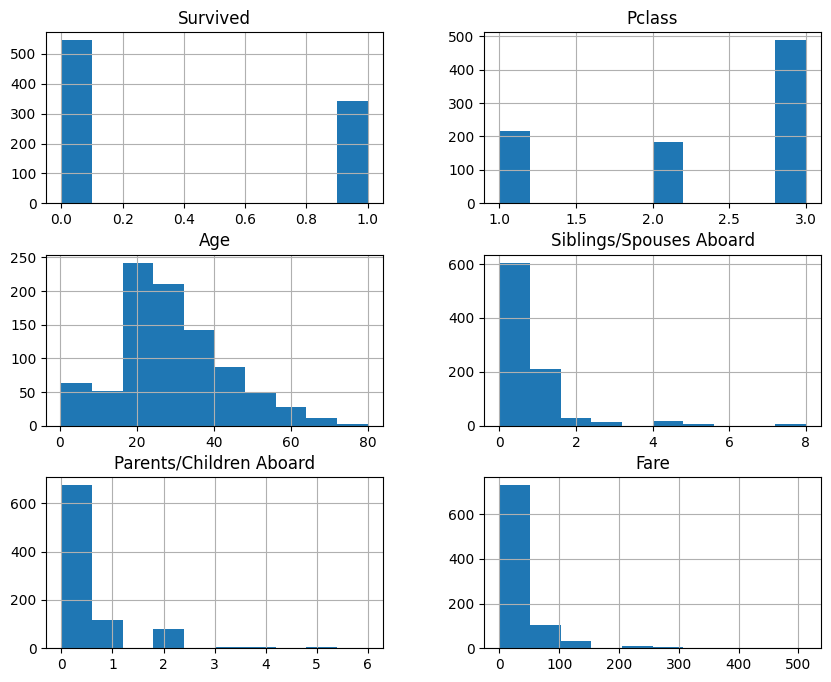

In [ ]:
# Make histograms
df.hist(figsize=(10, 8));

Chose not to remove any outliers, but you could make a case for removing some from `Siblings/Spouses Aboard`, `Parents/children Aboard`, and `Fare`.

##3. Transform the character variables into binary

In [ ]:
# Create dummy variable for Sex
df = pd.get_dummies(data=df,
                    drop_first=True)
df.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


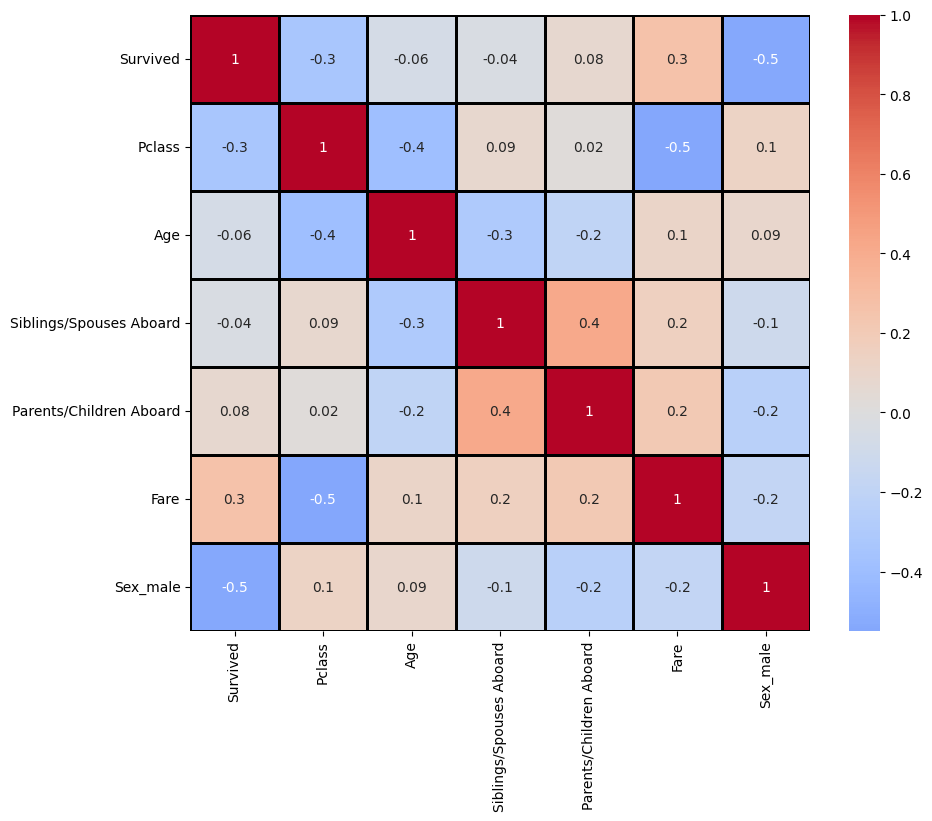

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),
            annot=True,
            fmt='.1g',
            center=0,
            cmap='coolwarm',
            linewidths=1,
            linecolor='black');

Only compare continuous variables (so not Survived, Pclass, Sex_male)

Doesn't look like there are strong positive correlations between any variables.

##4. Create training and test sets

In [ ]:
# Prepare X & y
y = df.Survived
X = df.drop(columns='Survived')
X = sm.add_constant(X)
X

,const,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,1.0,3,22.0,1,0,7.2500,1
1,1.0,1,38.0,1,0,71.2833,0
2,1.0,3,26.0,0,0,7.9250,0
3,1.0,1,35.0,1,0,53.1000,0
4,1.0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
882,1.0,2,27.0,0,0,13.0000,1
883,1.0,1,19.0,0,0,30.0000,0
884,1.0,3,7.0,1,2,23.4500,0
885,1.0,1,26.0,0,0,30.0000,1


In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1502)
len(X_train), len(y_train), len(X_test), len(y_test)

(709, 709, 178, 178)

##5. Use Logistic regression

In [ ]:
# Logistic regression
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.405125
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  709
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            6
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                  0.3915
Time:                        17:58:43   Log-Likelihood:                -287.23
converged:                       True   LL-Null:                       -472.06
Covariance Type:            nonrobust   LLR p-value:                 9.247e-77
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       6.2418      0.686      9.101      0.000       4.898   

Analysis shows that `Fare` and `Parents/Children Aboard` are statistically insignificant.

##6. Assess accuracy using classification report

In [ ]:
# Make predictions
y_preds = model.predict(X_test)
y_preds = np.where(y_preds > 0.5, 1, 0)
y_preds[:5]

array([1, 0, 0, 1, 0])

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)

array([[84, 24],
       [26, 44]])

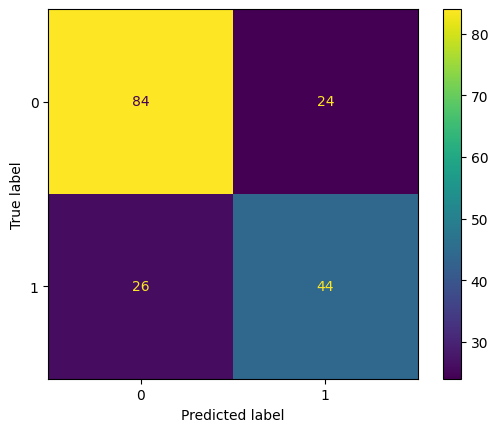

In [ ]:
# Confusion matrix with matplotlib
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       108
           1       0.65      0.63      0.64        70

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.72       178



Precision: Out of all the passengers that the model predicted survived, 65% actually did.

Recall: Out of all the passengers that actually did survive, the model  predicted this outcome correctly for 63% of those passengers.

F1 Score: 64%, model does a middling job of predicting survivors.

The model doesn't do a great job of accurately predicting who survives.  Needs to be improved.